# Tracking Changes to RietveldPhases

This notebook tracks changes as they're made to the RietveldPhases module/class.

In [1]:
from src.RietveldPhases import RietveldPhases as Rp

In [2]:
Rp.set_profile(r"./data/profiles/Jade-Al2O3-Sim.xye",number_of_columns=2)

In [3]:
tmp = Rp("./data/cifs/1000032.cif")
print str(tmp.U)
print tmp.U.tobytes()
tmp.U.tobytes()

('U',  0., -0.1,  0.1)
U                   ���������������?


'U\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9a\x99\x99\x99\x99\x99\xb9\xbf\x9a\x99\x99\x99\x99\x99\xb9?'

In [4]:
Rp.set_bkgd_order(2)
assert Rp.bkgd.shape[0] == 2

In [5]:
print Rp.two_theta

[  5.02   5.04   5.06 ...,  89.96  89.98  90.  ]


In [6]:
print Rp.I

[ 1.  1.  1. ...,  2.  2.  2.]


In [7]:
print Rp.background_polynomial()
Rp.bkgd['values'][0] = 1
print Rp.background_polynomial()

[ 0.  0.  0. ...,  0.  0.  0.]
[ 1.  1.  1. ...,  1.  1.  1.]


In [8]:
tmp.V

('V',  0., -0.1,  0.1)

In [9]:
import numpy as np
tmp2 = np.stack((tmp.U,tmp.V))

In [10]:
tmp2['labels'][1] = 'S'
tmp2

array([('U',  0., -0.1,  0.1), ('S',  0., -0.1,  0.1)],
      dtype=[('labels', 'S12'), ('values', '<f8'), ('l_limits', '<f8'), ('u_limits', '<f8')])

In [11]:
tmp.V = tmp2[1]
tmp.V

('S',  0., -0.1,  0.1)

In [12]:
Rp.assemble_global_x()
tmp.assemble_phase_x()
tmp.eta = tmp.set_eta_order(15)
tmp.assemble_phase_x()
tmp.phase_x[2]['values'] = .003
print tmp.phase_x[2]
tmp.update_params(tmp.phase_x)
tmp.W

('W',  0.003,   1.00000000e-06,  1.)


('W',  0.003,   1.00000000e-06,  1.)

In [13]:
str(tmp.eta)

"[('eta_0',  0.5,   0.00000000e+00,   1.00000000e+00)\n ('eta_1',  0. ,  -1.00000000e-03,   1.00000000e-03)\n ('eta_2',  0. ,  -1.00000000e-06,   1.00000000e-06)\n ('eta_3',  0. ,  -1.00000000e-09,   1.00000000e-09)\n ('eta_4',  0. ,  -1.00000000e-12,   1.00000000e-12)]"

In [14]:
Rp.bkgd
Rp.background_polynomial()

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [15]:
tmp.set_lattice_parameters()
tmp.recompute_peak_positions = True
tmp.assemble_phase_x()
print tmp.crystal_system
tmp.phase_x[9]['values'] = 4.8
tmp.update_params(tmp.phase_x)
tmp.unit_cell.parameters()

HTrigonal


(4.8, 4.8, 12.995599999999998, 90.0, 90.0, 120.0)

In [16]:
tmp.lattice_parameters[0]

('uc_a',  4.8,  4.712895,  4.808105)

In [17]:
tmp.eta_polynomial()

array([ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5])

In [18]:
float(tmp.U['values'])

0.0

In [19]:
np.max(tmp.phase_profile())

10067.409497205848

<IPython.core.display.Javascript object>


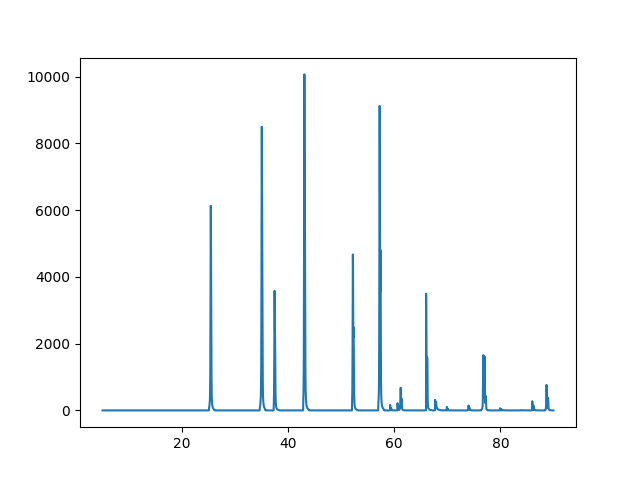

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
tmp.recompute_peak_positions = True
tmp.phase_x[9]['values'] = 4.8
tmp.update_params(tmp.phase_x)
plt.plot(Rp.two_theta,tmp.phase_profile())
plt.show()

In [21]:
tmp.assemble_phase_x()